In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}
# Lista de estados
lista_estados = []
for regiao in regioes:
    lista_estados += list(regioes[regiao])

## Percentual de mortes de pessoas negras em relação ao número total de mortes em acidente de transporte nos municípios brasileiros. Seguindo critério adotado pelo IBGE, foram consideradas negras, a soma das pessoas pretas e pardas.
Arquivo: [proporcao_mortes_negras_acidente_transporte](https://basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=proporcao_mortes_negras_acidente_transporte)

In [391]:
# DataFrame Proporção de Mortes
df_prop_mortes = pd.read_csv("../datasets/proporcao_mortes_negras_acidente_transporte.csv")

In [392]:
df_prop_mortes.head()

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
0,2000,RO,1100015,Total,50.000000
1,2000,RO,1100023,Total,42.857143
2,2000,RO,1100031,Total,0.000000
3,2000,RO,1100049,Total,73.333333
4,2000,RO,1100056,Total,50.000000


## Orçamento de municípios por função
Arquivos:<br>
[finbra_2021.csv](https://drive.google.com/file/d/1bR2g3AZJORRJjTBCVQnqbCPCvO_VnuYD/view?usp=sharing)<br>
[finbra_2013.csv](https://drive.google.com/file/d/1jtf2Gi_IM_3BGu6awFgD17Wnofe_U5Vy/view?usp=sharing)<br>
[Fonte](https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf)

In [443]:
# DataFrame Despesas de 2021
df_despesas_2021 = pd.read_csv("../outros/finbra_2021.csv")

In [444]:
df_despesas_2021.head()

,Instituicao,Cod_municipio,UF,Populacao,Coluna,Conta,Identificador_Conta,Valor,Unnamed: 8
0,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,Despesas Exceto Intraor�ament�rias,siconfi-cor_TotalDespesas,30819758.0,NaN
1,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,01 - Legislativa,siconfi-cor_TotalDespesas,982533.0,NaN
2,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,01.031 - A��o Legislativa,siconfi-cor_TotalDespesas,982533.0,NaN
3,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,04 - Administra��o,siconfi-cor_TotalDespesas,2587777.0,41.0
4,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,04.122 - Administra��o Geral,siconfi-cor_TotalDespesas,1872925.0,38.0


In [445]:
# DataFrame Despesas de 2013
df_despesas_2013 = pd.read_csv("../outros/finbra_2013.csv")

In [446]:
df_despesas_2013.head()

,Instituicao,Cod_municipio,UF,Populacao,Coluna,Conta,Identificador_Conta,Valor,Unnamed: 8
0,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,Despesas (Exceto Intra-Or�ament�rias),siconfi-cor_TotalDespesas,13531296.0,NaN
1,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,04 - Administra��o,siconfi-cor_TotalDespesas,3089348.0,NaN
2,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,04.122 - Administra��o Geral,siconfi-cor_TotalDespesas,3089348.0,NaN
3,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,08 - Assist�ncia Social,siconfi-cor_TotalDespesas,589100.0,34.0
4,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,08.241 - Assist�ncia ao Idoso,siconfi-cor_TotalDespesas,8854.0,49.0


## Raça/Cor dos municípios brasileiros

In [544]:
df_raca = pd.read_csv("../outros/municipio_raca_cor.csv")

## Tratamento dos dados da tabela sobre proporção de mortes negras

In [393]:
# Colocando um nome mais simples para a coluna
df_prop_mortes.rename(columns = {"prop_mortes_negras_acidente_transporte": "prop_mortes"}, 
                      inplace=True)

#### Exclusão de linhas vazias
O dataset possui 3.240 linhas com o campo *id_municipio* vazio, então achei que seria melhor excluirmos essas linhas a fim de manter os dados mais consistentes.

In [394]:
# Linhas com id_municipio vazio
df_prop_mortes[df_prop_mortes["id_municipio"] == " "]

,ano,sigla_uf,id_municipio,indicador,prop_mortes
258,2000,PA,,Total,100.000000
976,2000,CE,,Total,83.333333
1086,2000,RN,,Total,0.000000
1165,2000,RN,,Total,100.000000
1396,2000,PB,,Total,0.000000
...,...,...,...,...,...
667773,2019,RS,,Outros,0.000000
667914,2019,RS,,Outros,0.000000
667927,2019,RS,,Outros,0.000000
668105,2019,MT,,Outros,0.000000


In [395]:
df_prop_mortes = df_prop_mortes[df_prop_mortes["id_municipio"] != " "]

### Informações sobre a tabela

In [270]:
indicadores = df_prop_mortes["indicador"].unique()
indicadores

array(['Total', 'Pedestres', 'Ciclistas', 'Motociclistas',
       'Ocupantes de automóvel', 'Outros'], dtype=object)

In [271]:
# Unidades da Federação presentes no DataFrame
estados = df_prop_mortes["sigla_uf"].unique()
estados

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

#### Observação
O dataset atual trata da morte de ciclistas, motoristas, pedestres, etc. Porém, para essa análise, somente as proporções totais serão usadas. Para isso, excluirei as linhas que tratam de outros tipos de acidentes.

In [396]:
df_prop_mortes = df_prop_mortes[df_prop_mortes["indicador"] == "Total"]

In [397]:
df_prop_mortes = df_prop_mortes.drop(["indicador"], axis=1)

#### Observação
Vamos manter os dados sobre proporção entre 0 e 1, a fim de manter da mesma forma como os dados sobre despesas estão.

In [398]:
df_prop_mortes["prop_mortes"] = df_prop_mortes["prop_mortes"] / 100

### Os 10 municípios com maiores percentuais de mortes negras abaixo de 100% em 2000

In [399]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2000) & 
    (df_prop_mortes["prop_mortes"] != 1.0)
].sort_values(by="prop_mortes", ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
1542,2000,PE,2607208,0.947368
216,2000,PA,1504208,0.941176
1574,2000,PE,2609600,0.933333
489,2000,MA,2102325,0.916667
2000,2000,BA,2914653,0.916667
111,2000,AM,1302603,0.910506
186,2000,PA,1502400,0.904762
1584,2000,PE,2610608,0.900000
1050,2000,CE,2312304,0.900000
250,2000,PA,1506138,0.896552


### Os 10 municípios com maiores percentuais de mortes negras abaixo de 100% em 2019

In [400]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2019) & 
    (df_prop_mortes["prop_mortes"] != 1.0)
].sort_values(by="prop_mortes", ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
635243,2019,PA,1506807,0.975904
636982,2019,BA,2914802,0.974359
635166,2019,PA,1502400,0.971429
640432,2019,GO,5212501,0.968750
636631,2019,AL,2700300,0.967949
636936,2019,BA,2910800,0.962963
637040,2019,BA,2919553,0.960000
635591,2019,MA,2109908,0.956522
635469,2019,MA,2102325,0.956522
637116,2019,BA,2925303,0.954545


### Os 10 municípios com menores percentuais de mortes negras acima de 0% em 2000

In [401]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2000) & 
    (df_prop_mortes["prop_mortes"] != 0.0)
].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
4907,2000,RS,4314100,0.012346
3521,2000,SP,3522307,0.021277
4966,2000,RS,4316907,0.026316
5000,2000,RS,4318705,0.027027
3966,2000,PR,4104006,0.029412
2489,2000,MG,3122306,0.031250
5376,2000,GO,5205109,0.033333
4185,2000,PR,4119905,0.037975
2856,2000,MG,3152501,0.040000
4376,2000,SC,4204202,0.040000


### Os 10 municípios com menores percentuais de mortes negras acima de 0% em 2019

In [402]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2019) & 
    (df_prop_mortes["prop_mortes"] != 0.0)
].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
639364,2019,SC,4204608,0.027027
638949,2019,PR,4104204,0.042553
639579,2019,SC,4219507,0.043478
640061,2019,RS,4322608,0.047619
639138,2019,PR,4117701,0.052632
639385,2019,SC,4205902,0.052632
639951,2019,RS,4317202,0.052632
638849,2019,SP,3554003,0.052632
638946,2019,PR,4104006,0.052632
639506,2019,SC,4214805,0.058824


## Tratamento dos dados das tabelas sobre despesas

#### Observação:
Apenas as linhas de despesas necessariamente pagas relacionadas a gastos com transporte serão usadas, já que outros tipos de investimento não serão necessários para essa análise. Além disso, somente serão usadas as colunas com o código do município, sigla da unidade federativa e o valor da despesa paga em transporte.

In [447]:
def get_necessario(dataframes):
    for dataframe in dataframes:
        dataframe = dataframe[(dataframe["Conta"] == "26 - Transporte") &
                              (dataframe["Coluna"] == "Despesas Pagas")][
                              ["Cod_municipio", "UF", "Valor"]]
        dataframe.columns = ["id_municipio", "sigla_uf", "valor"]
        dataframe.index = dataframe["id_municipio"].astype(int)
        dataframe.drop(["id_municipio"], axis=1, inplace=True)
        yield dataframe

In [448]:
df_despesas_2013, df_despesas_2021 = get_necessario([df_despesas_2013, df_despesas_2021])

In [449]:
df_despesas_2013.head()

,sigla_uf,valor
id_municipio,,
4126652,PR,1583648.0
4206652,SC,1582579.0
4310405,RS,413069.0
4322533,RS,1378911.0
4318705,RS,774243.0


In [450]:
df_despesas_2021.head()

,sigla_uf,valor
id_municipio,,
4309902,RS,3766701.0
4308201,RS,16815173.0
4211652,SC,1835225.0
4315156,RS,3025385.0
4314001,RS,2612626.0


### Médias de investimento das regiões em 2013 e 2021

In [451]:
lista_medias_2013 = []
lista_medias_2021 = []
for regiao in regioes:
    media_2013 = int(df_despesas_2013[df_despesas_2013["sigla_uf"].isin(regioes[regiao])]["valor"].mean())
    media_2021 = int(df_despesas_2021[df_despesas_2021["sigla_uf"].isin(regioes[regiao])]["valor"].mean())
    lista_medias_2013.append(media_2013)
    lista_medias_2021.append(media_2021)

df_desp_med_2013 = pd.DataFrame(lista_medias_2013, 
                                index=regioes, 
                                columns=["media"]).sort_values(by="media", ascending=False)
df_desp_med_2021 = pd.DataFrame(lista_medias_2021, 
                                index=regioes, 
                                columns=["media"]).sort_values(by="media", ascending=False)

In [452]:
# DataFrame Despesa Média 2013
df_desp_med_2013

,media
Sudeste,3644537
Centro-Oeste,1835748
Sul,1639701
Norte,1339501
Nordeste,469182


In [453]:
# DataFrame Despesa Média em 2021
df_desp_med_2021

,media
Sudeste,6844551
Centro-Oeste,3880576
Norte,3302650
Sul,3201229
Nordeste,1122277


### Variação do investimento em transporte entre 2013 e 2021 das regiões

In [454]:
df_variacao = ((df_desp_med_2021 - df_desp_med_2013) / df_desp_med_2013).sort_values(by="media", 
                                                                                     ascending=False)
df_variacao.columns=["variação média"]
df_variacao

,variação média
Norte,1.465582
Nordeste,1.391986
Centro-Oeste,1.113894
Sul,0.952325
Sudeste,0.878030


## Análise dos Dados

### Analisando a média da porcentagem de mortes totais por região durante o período de 2000 a 2019

In [403]:
def get_media_prop_by_regiao_ano(regiao, ano):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: média do percentual de pessoas próximas a redes de transporte
    """
    media = df_prop_mortes[(df_prop_mortes["ano"] == ano) &
                           (df_prop_mortes["sigla_uf"].isin(regioes[regiao]))]["prop_mortes"].mean()
    return media

In [404]:
medias_regiao = np.array([get_media_prop_by_regiao(regiao, ano) 
                          for ano in range(2000, 2020)
                          for regiao in regioes]).reshape(20,5)

df_med_prop_mortes = pd.DataFrame(medias_regiao, index=periodo_prop_mortes, columns=regioes)
# DataFrame média de mortes nas regiões entre 2000 e 2019
df_med_prop_mortes.head()

,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
2000,0.295604,0.303492,0.125809,0.250415,0.067097
2001,0.313526,0.315945,0.125487,0.256372,0.049464
2002,0.338348,0.363575,0.159104,0.271929,0.057039
2003,0.376528,0.358494,0.166776,0.306951,0.047606
2004,0.411097,0.391302,0.184722,0.332621,0.065427


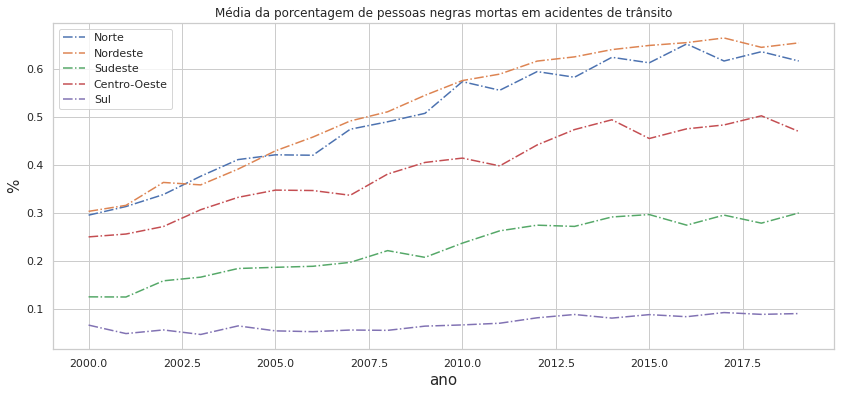

In [405]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.plot(df_med_prop_mortes, '-.')
plt.title("Média da porcentagem de pessoas negras mortas em acidentes de trânsito")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Analisando a variação da porcentagem de mortes entre os municípios nas regiões nos períodos (2000-2013) e (2013-2019)

In [409]:
def get_df_by_ano(anos):
    for ano in anos:
        dataframe = df_prop_mortes[df_prop_mortes["ano"] == ano]
        dataframe.index = dataframe["id_municipio"].astype(int)
        dataframe = dataframe.drop(["id_municipio", "ano"], axis=1)
        yield dataframe

df_prop_mortes_2000, df_prop_mortes_2013, df_prop_mortes_2019 = get_df_by_ano([2000, 2013, 2019])

In [410]:
# DataFrame porcentagem de mortos em 2000
df_prop_mortes_2000.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.500000
1100023,RO,0.428571
1100031,RO,0.000000
1100049,RO,0.733333
1100056,RO,0.500000


In [411]:
# DataFrame porcentagem de mortes em 2013
df_prop_mortes_2013.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.285714
1100023,RO,0.607843
1100031,RO,0.000000
1100049,RO,0.555556
1100056,RO,0.428571


In [412]:
# DataFrame porcentagem de mortes em 2019
df_prop_mortes_2019.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.600000
1100023,RO,0.846154
1100031,RO,1.000000
1100049,RO,0.641791
1100056,RO,0.500000


In [413]:
def get_dif(df1, df2):
    df_diferenca = df2.copy()
    df_diferenca["diferenca"] = df1["prop_mortes"] - df2["prop_mortes"]
    df_diferenca.drop(["prop_mortes"], axis=1, inplace=True)
    return df_diferenca

In [414]:
df_dif_prop_2013_2000 = get_dif(df_prop_mortes_2013, df_prop_mortes_2000)
# DataFrame diferença de porcentagem de mortos entre 2000 e 2013
df_dif_prop_2013_2000.head()

,sigla_uf,diferenca
id_municipio,,
1100015,RO,-0.214286
1100023,RO,0.179272
1100031,RO,0.000000
1100049,RO,-0.177778
1100056,RO,-0.071429


In [415]:
df_dif_prop_2019_2013 = get_dif(df_prop_mortes_2019, df_prop_mortes_2013)
# Dataframe diferença de porcentagem de mortoes entre 2013 e 2019
df_dif_prop_2019_2013.head()

,sigla_uf,diferenca
id_municipio,,
1100015,RO,0.314286
1100023,RO,0.238311
1100031,RO,1.000000
1100049,RO,0.086235
1100056,RO,0.071429


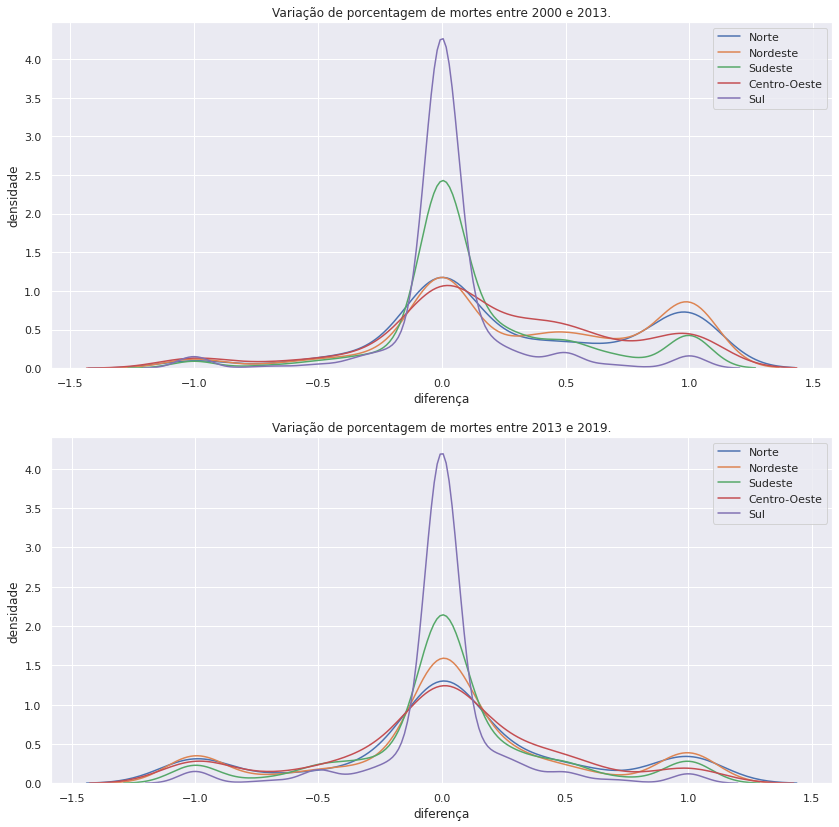

In [416]:
periodos = ("2000 e 2013", "2013 e 2019")
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 1, figsize=(14, 14))

for i, dataframe in enumerate([df_dif_prop_2013_2000, df_dif_prop_2019_2013]):
    for regiao in regioes:
        regiao_diferencas = dataframe[dataframe["sigla_uf"].isin(regioes[regiao])]["diferenca"]
        sns.kdeplot(regiao_diferencas, ax=axes[i], label=regiao)
    axes[i].set_title("Variação de porcentagem de mortes entre " + periodos[i] + ".")
    axes[i].set_xlabel("diferença")
    axes[i].set_ylabel("densidade")
    axes[i].legend()
plt.show()

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2000, 2013 e 2019

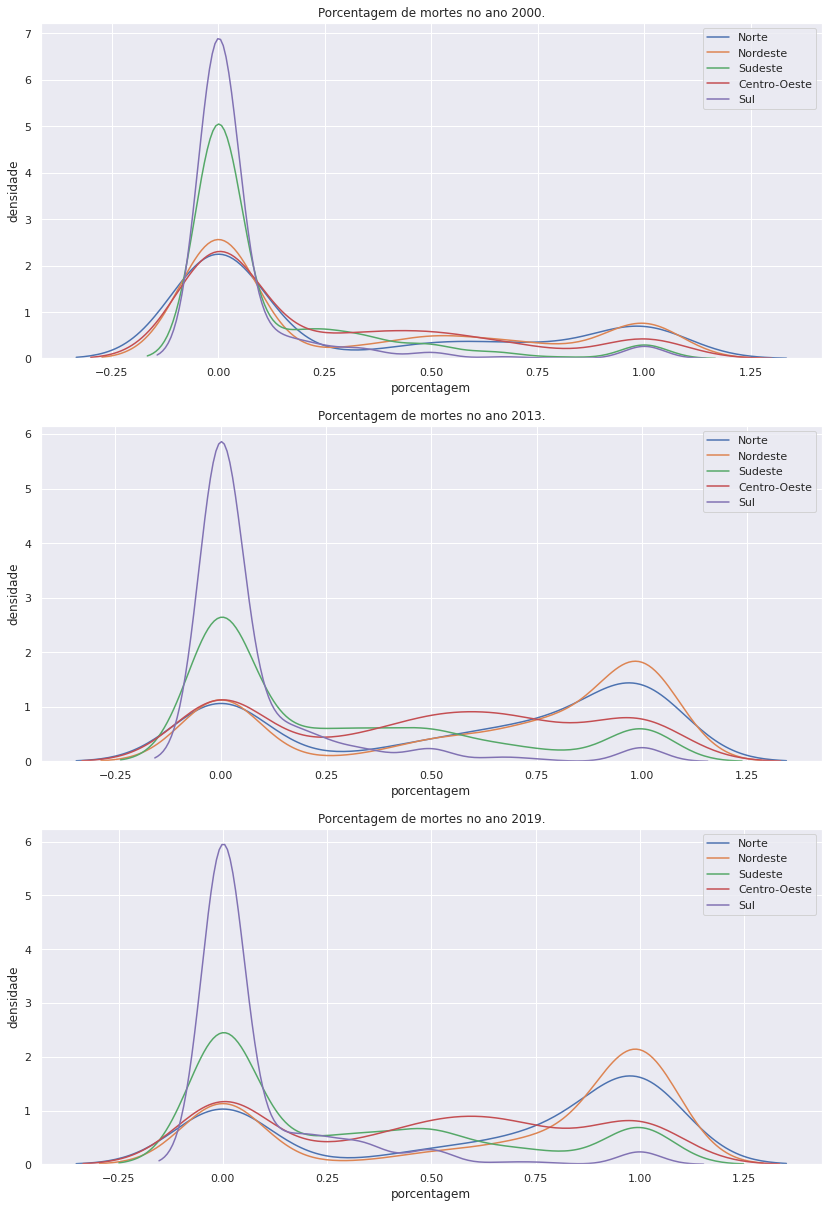

In [417]:
anos = ("2000", "2013", "2019")
sns.set_style("darkgrid")
f, axes = plt.subplots(3, 1, figsize=(14, 21))

for i, dataframe in enumerate([df_prop_mortes_2000, df_prop_mortes_2013, df_prop_mortes_2019]):
    for regiao in regioes:
        regiao_mortes = dataframe[dataframe["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
        sns.kdeplot(regiao_mortes, ax=axes[i], label=regiao)
    axes[i].set_title("Porcentagem de mortes no ano " + anos[i] + ".")
    axes[i].set_xlabel("porcentagem")
    axes[i].set_ylabel("densidade")
    axes[i].legend()
plt.show()

### Analisando a variação das despesas em transporte nos municípios nas regiões

In [455]:
df_dif_despesas = pd.DataFrame(df_despesas_2013["sigla_uf"])
df_dif_despesas["variacao"] = (df_despesas_2021["valor"] - df_despesas_2013["valor"]) / df_despesas_2013["valor"]
df_dif_despesas.dropna(inplace=True)
df_dif_despesas.head()

,sigla_uf,variacao
id_municipio,,
4126652,PR,0.897629
4206652,SC,0.548615
4310405,RS,4.477782
4322533,RS,0.494787
4318705,RS,2.647638


In [456]:
# Excluindo as variações 'fora do normal' para melhor vizualização no gráfico
df_dif_despesas = df_dif_despesas[(df_dif_despesas["variacao"] > -2) & 
                                  (df_dif_despesas["variacao"] < 2)]

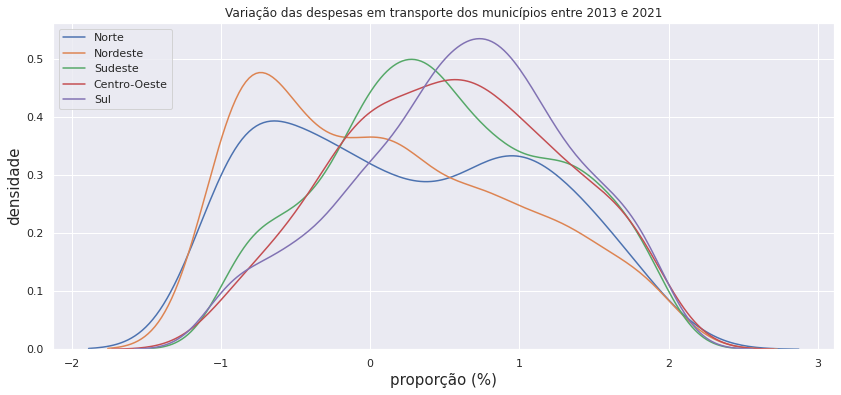

In [457]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_variacoes = df_dif_despesas[df_dif_despesas["sigla_uf"].isin(regioes[regiao])]["variacao"]
    sns.kdeplot(regiao_variacoes)
plt.title("Variação das despesas em transporte dos municípios entre 2013 e 2021")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

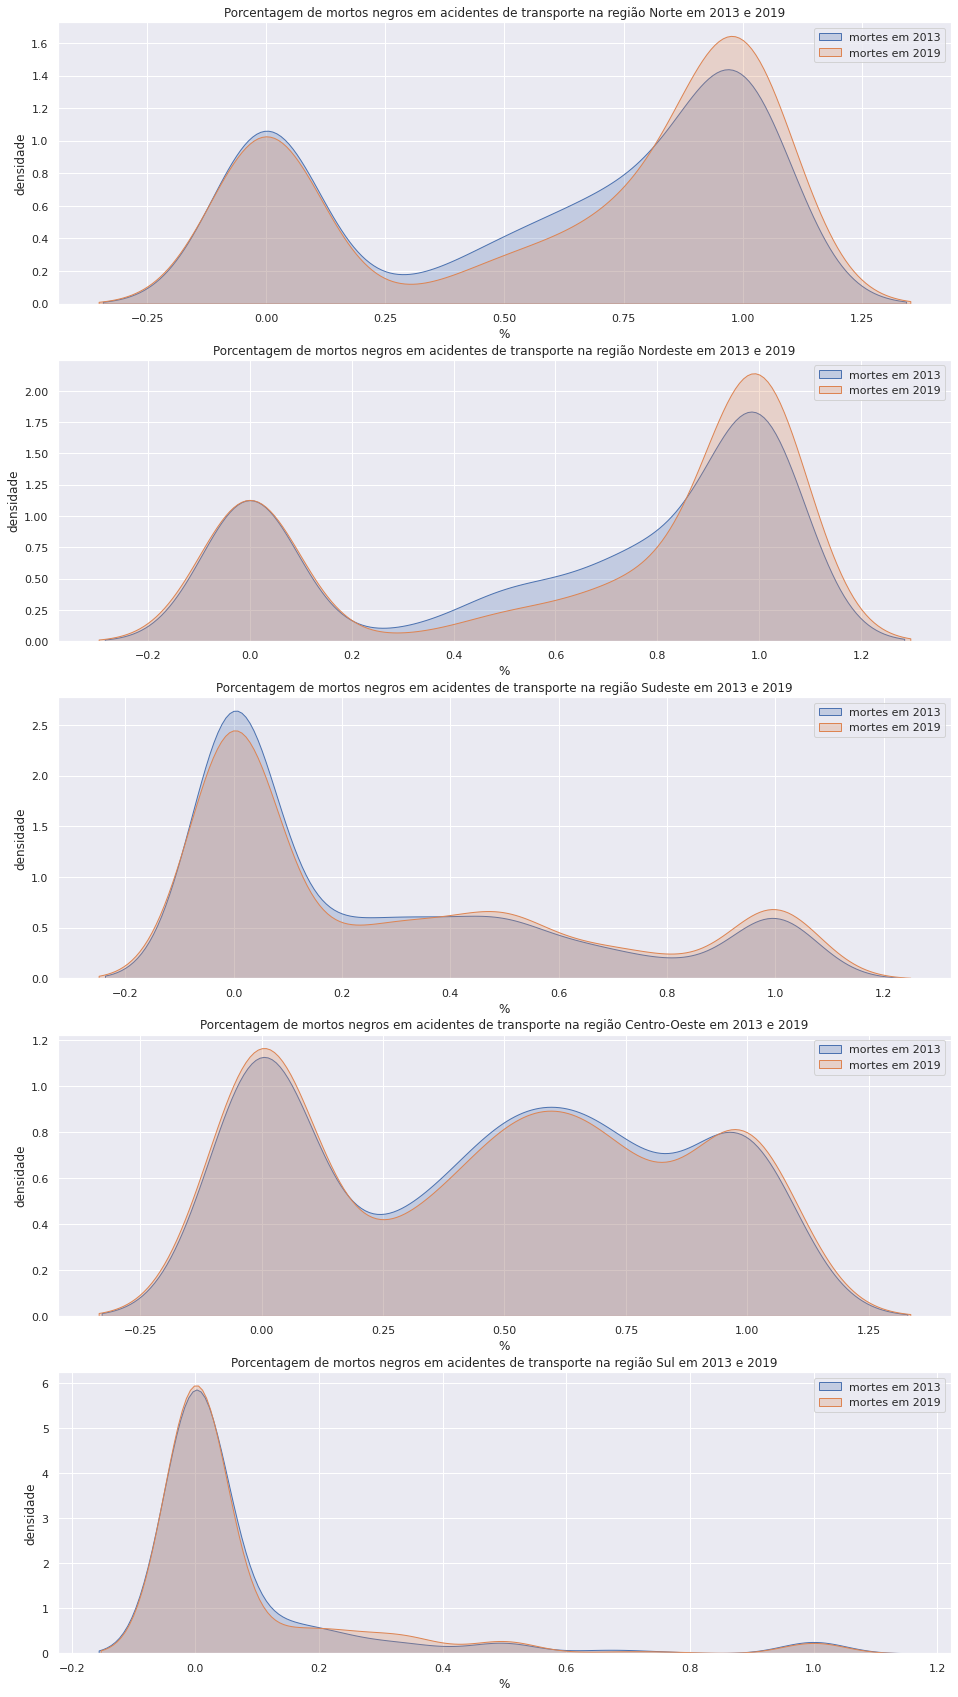

In [534]:
sns.set_style("darkgrid")
f, axes = plt.subplots(5, 1, figsize=(16, 30))

for i, regiao in enumerate(regioes):
    regiao_prop_2013 = df_prop_mortes_2013[
        df_prop_mortes_2013["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    regiao_prop_2019 = df_prop_mortes_2019[
        df_prop_mortes_2019["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    
    sns.kdeplot(regiao_prop_2013, shade=True, ax=axes[i], label="mortes em 2013")
    sns.kdeplot(regiao_prop_2019, shade=True, ax=axes[i], label="mortes em 2019")
    axes[i].set_title("Porcentagem de mortos negros em acidentes de transporte na região " + 
                      regiao + " em 2013 e 2019")
    axes[i].legend()
    axes[i].set_xlabel("%")
    axes[i].set_ylabel("densidade")
plt.show()

## Analisando a distribuição das porcentagens de mortes entre as regiões

In [63]:
def tamanho_by_intervalo_regiao(dataframe, limite, regiao, indicador):
    if limite == 0:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] < 0)])
    if limite == 25:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] >= 0) &
                             (dataframe[indicador] <= 0.25)])
    elif limite == 50:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 0.25) &
                             (dataframe[indicador] <= 0.50)])
    elif limite == 75:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 0.50) & 
                             (dataframe[indicador] <= 0.75)])
    elif limite == 100:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 0.75) &
                             (dataframe[indicador] <= 1)])
    else:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 1)])

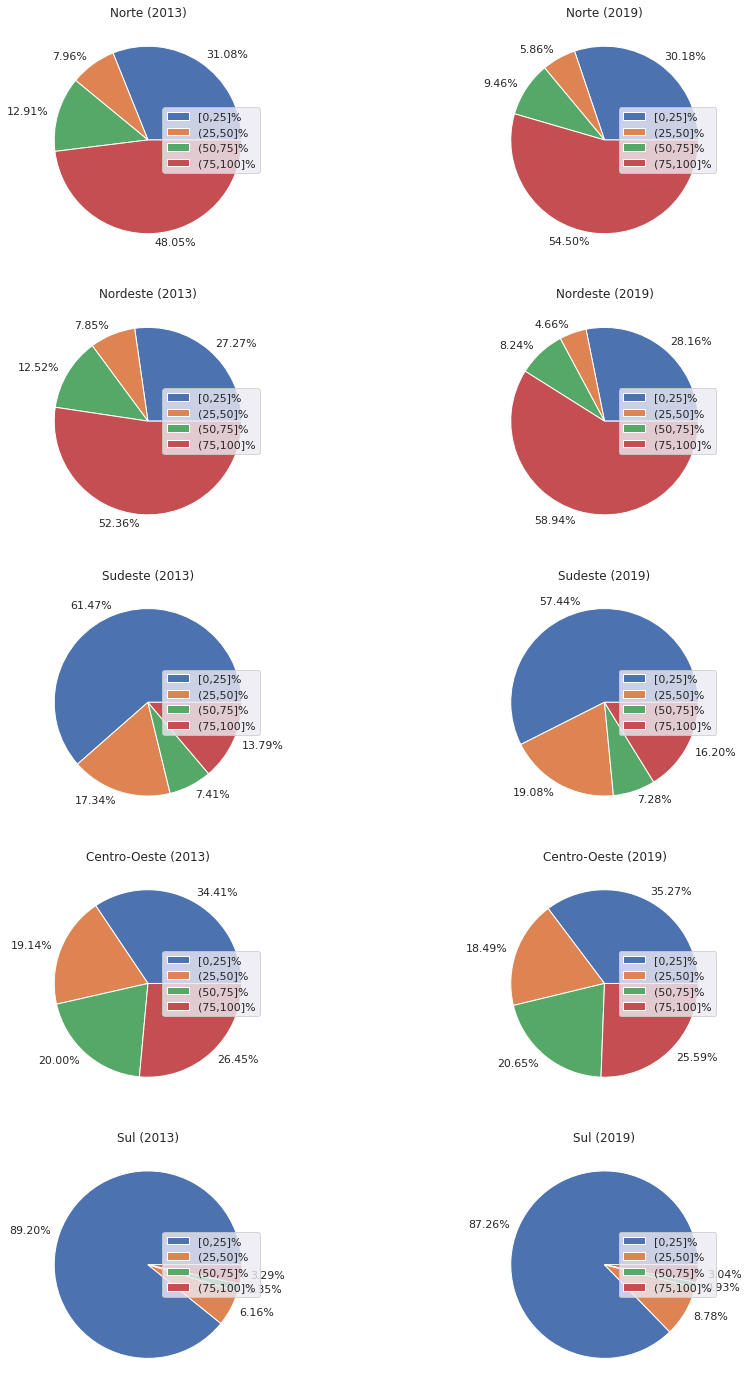

In [535]:
legenda = ["[0,25]%", "(25,50]%", "(50,75]%", "(75,100]%"]
limites = [25, 50, 75, 100]
fig, axs = plt.subplots(5, 2, figsize=(15,25))
for i, regiao in enumerate(regioes):
    for j, df_ano in enumerate([df_prop_mortes_2013, df_prop_mortes_2019]):
        total = (len(df_ano[df_ano["sigla_uf"].isin(regioes[regiao])]))
        porcentagens = []
        labels = []
        for limite in limites:
            qtd = tamanho_by_intervalo_regiao(df_ano, limite, regiao, "prop_mortes")
            porcentagens.append(qtd)
            labels.append("{0:.2f}%".format((qtd / total) * 100))
        axs[i,j].pie(porcentagens, labels=labels)
        axs[i,j].set_title("{0} ({1})".format(regiao, 2013 + j*6))
        axs[i,j].legend(legenda, loc="center right")
plt.show()

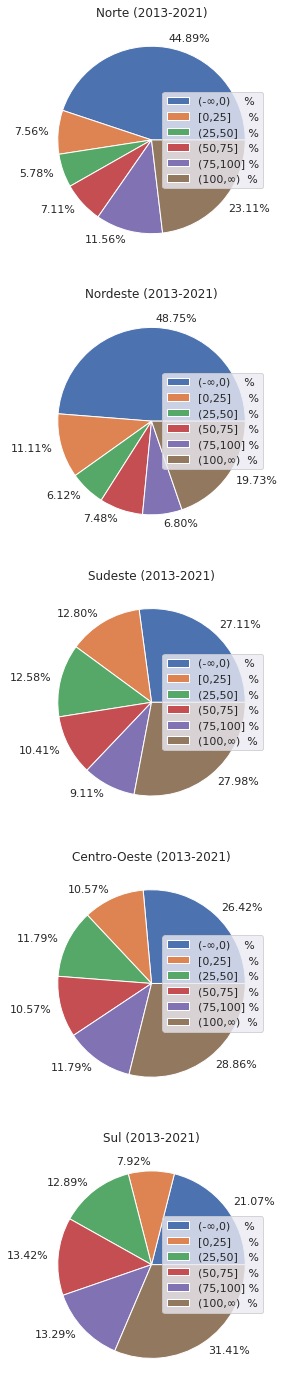

In [543]:
legenda = ["(-∞,0)    %", "[0,25]     %", "(25,50]   %", "(50,75]   %", "(75,100] %", "(100,∞)  %"]
limites = [0, 25, 50, 75, 100, 150]
fig, axs = plt.subplots(5, 1, figsize=(15,25))
for i, regiao in enumerate(regioes):
    total = len(dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])])
    porcentagens = []
    labels = []
    for limite in limites:
        qtd = tamanho_by_intervalo_regiao(df_dif_despesas, limite, regiao, "variacao")
        porcentagens.append(qtd)
        labels.append("{0:.2f}%".format((qtd / total) * 100))
    axs[i].pie(porcentagens, labels=labels)
    axs[i].set_title("{0} (2013-2021)".format(regiao))
    axs[i].legend(legenda, loc="center right")
plt.show()

In [73]:
df_mcp_cor.head()

,id_municipio,Total,Branca,Preta,Parda
0,1100015,100,"43,39","4,49","49,7"
1,1100023,100,"35,44","8,64","53,68"
2,1100031,100,"46,22","7,37","44,78"
3,1100049,100,"41,79","5,77","49,27"
4,1100056,100,"47,83","5,08","46,07"
...,...,...,...,...,...
5560,5222005,100,"41,02","6,95","50,79"
5561,5222054,100,"46,58","3,57","48,44"
5562,5222203,100,"15,49","9,86","71,83"
5563,5222302,100,"26,84","6,11","64,43"


In [74]:
df_mcp_cor["Preta"] = df_mcp_cor["Preta"].str.replace("-", "0")

In [76]:
for cor in ["Branca", "Preta", "Parda"]:
    df_mcp_cor.loc[:, cor] = df_mcp_cor[cor].str.replace(',', '.').astype(float).copy()

In [77]:
df_mcp_cor.head()

,id_municipio,Total,Branca,Preta,Parda
0,1100015,100,43.39,4.49,49.70
1,1100023,100,35.44,8.64,53.68
2,1100031,100,46.22,7.37,44.78
3,1100049,100,41.79,5.77,49.27
4,1100056,100,47.83,5.08,46.07


In [78]:
estado_by_codigo = {11: "RO", 12: "AC", 13: "AM", 14: "RR", 15: "PA", 16: "AP", 17: "TO",
                    21: "MA", 22: "PI", 23: "CE", 24: "RN", 25: "PB", 26: "PE", 27: "AL",
                    28: "SE", 29: "BA", 31: "MG", 32: "ES", 33: "RJ", 35: "SP", 41: "PR", 
                    42: "SC", 43: "RS", 50: "MS", 51: "MT", 52: "GO", 53: "DF"}
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}
regiao_by_estado = {}
for regiao in regioes:
    for estado in regioes[regiao]:
        regiao_by_estado[estado] = regiao
regiao_by_estado

{'AC': 'Norte',
 'AM': 'Norte',
 'TO': 'Norte',
 'AP': 'Norte',
 'PA': 'Norte',
 'RR': 'Norte',
 'RO': 'Norte',
 'MA': 'Norte',
 'CE': 'Nordeste',
 'AL': 'Nordeste',
 'SE': 'Nordeste',
 'PE': 'Nordeste',
 'BA': 'Nordeste',
 'PI': 'Nordeste',
 'PB': 'Nordeste',
 'RN': 'Nordeste',
 'ES': 'Sudeste',
 'SP': 'Sudeste',
 'RJ': 'Sudeste',
 'MG': 'Sudeste',
 'DF': 'Centro-Oeste',
 'MT': 'Centro-Oeste',
 'MS': 'Centro-Oeste',
 'GO': 'Centro-Oeste',
 'RS': 'Sul',
 'PR': 'Sul',
 'SC': 'Sul'}

In [79]:
regioes_df = {"Norte": pd.DataFrame(columns=["porc_negros"]),
              "Nordeste": pd.DataFrame(columns=["porc_negros"]),
              "Sudeste": pd.DataFrame(columns=["porc_negros"]),
              "Centro-Oeste": pd.DataFrame(columns=["porc_negros"]),
              "Sul": pd.DataFrame(columns=["porc_negros"])}

for codigo in estado_by_codigo:
    df_estado = df_mcp_cor[df_mcp_cor["id_municipio"] // 10**5 == codigo][["Preta", "Parda"]].copy()
    df_porc = pd.DataFrame((df_estado["Preta"] + df_estado["Parda"]).values, columns=["porc_negros"])
    regiao = regiao_by_estado[estado_by_codigo[codigo]]
    regioes_df[regiao] = pd.concat([regioes_df[regiao], df_porc])

In [80]:
regioes_df["Norte"]

,porc_negros
0,54.19
1,62.32
2,52.15
3,55.04
4,51.15
...,...
212,77.32
213,75.96
214,72.17
215,77.55


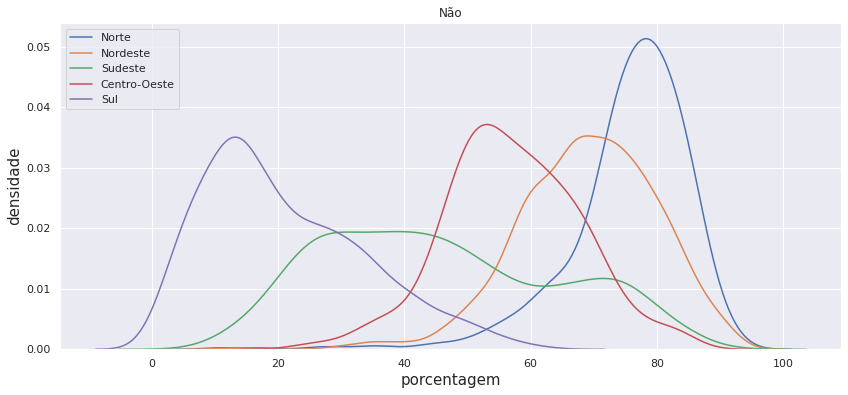

In [82]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
#for regiao in regioes:
#    regiao_diferencas = dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])]["diferenca"]
#    sns.kdeplot(regiao_diferencas)
for regiao in regioes:
    sns.kdeplot(regioes_df[regiao]["porc_negros"].values)
plt.title("Não")
plt.xlabel("porcentagem", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Cruzando dados das tabelas sobre diferença da porcentagem de mortos e variação das despesas com transporte

In [459]:
df_desp_prop = pd.merge(df_dif_prop_2019_2013, 
                        df_dif_despesas["variacao"], 
                        left_index=True, 
                        right_index=True)
df_desp_prop.rename(columns = {"diferenca": "diferenca prop",
                               "variacao": "variacao desp"}, 
                      inplace=True)
df_desp_prop.head()

,sigla_uf,diferenca prop,variacao desp
id_municipio,,,
1100015,RO,0.314286,0.478671
1100031,RO,1.000000,0.614573
1100049,RO,0.086235,0.969398
1100056,RO,0.071429,-0.335133
1100072,RO,0.000000,1.340543
...,...,...,...
5221908,GO,0.000000,0.026791
5222005,GO,0.035714,0.661805
5222054,GO,0.500000,0.417466


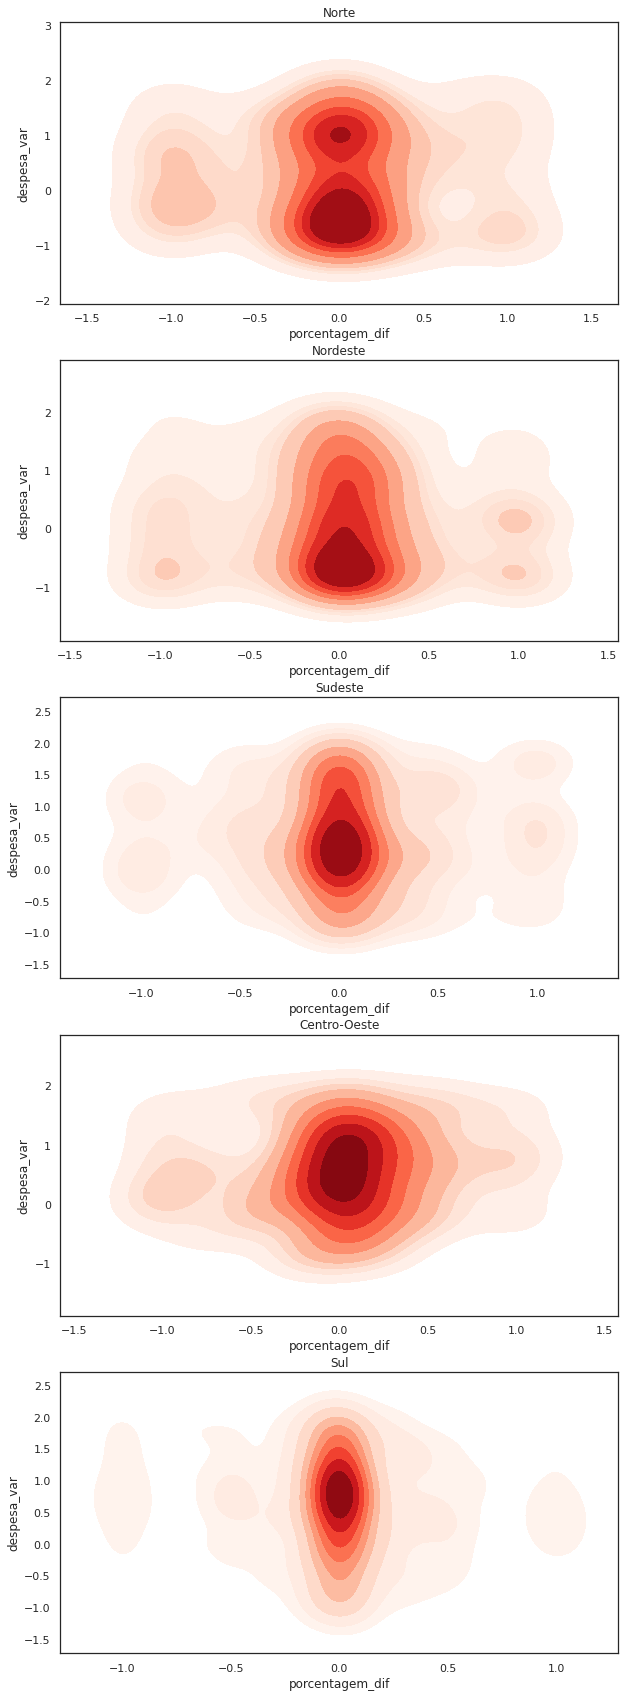

In [527]:
sns.set_style("white")
f, axes = plt.subplots(5, 1, figsize=(10, 30))
for i, regiao in enumerate(regioes):
    diferenca_prop = np.array(df_desp_prop[df_desp_prop["sigla_uf"].isin(regioes[regiao])]["diferenca prop"])
    variacao_desp = np.array(df_desp_prop[df_desp_prop["sigla_uf"].isin(regioes[regiao])]["variacao desp"])
    sns.kdeplot(x=diferenca_prop, y=variacao_desp, cmap="Reds", shade=True, ax=axes[i])
    axes[i].set_title(regiao)
    axes[i].set_xlabel("porcentagem_dif")
    axes[i].set_ylabel("despesa_var")
plt.show()

### Cruzando dados das tabelas sobre porcentagem de mortos em 2019 e variação das despesas com transporte

In [530]:
df_desp_prop = pd.merge(df_prop_mortes_2019, 
                        df_dif_despesas["variacao"], 
                        left_index=True, 
                        right_index=True)
df_desp_prop.rename(columns = {"prop_mortes": "prop_mortes_2019",
                               "variacao": "variacao desp"}, 
                      inplace=True)
df_desp_prop.head()

,sigla_uf,prop_mortes_2019,variacao desp
id_municipio,,,
1100015,RO,0.600000,0.478671
1100031,RO,1.000000,0.614573
1100049,RO,0.641791,0.969398
1100056,RO,0.500000,-0.335133
1100072,RO,0.000000,1.340543


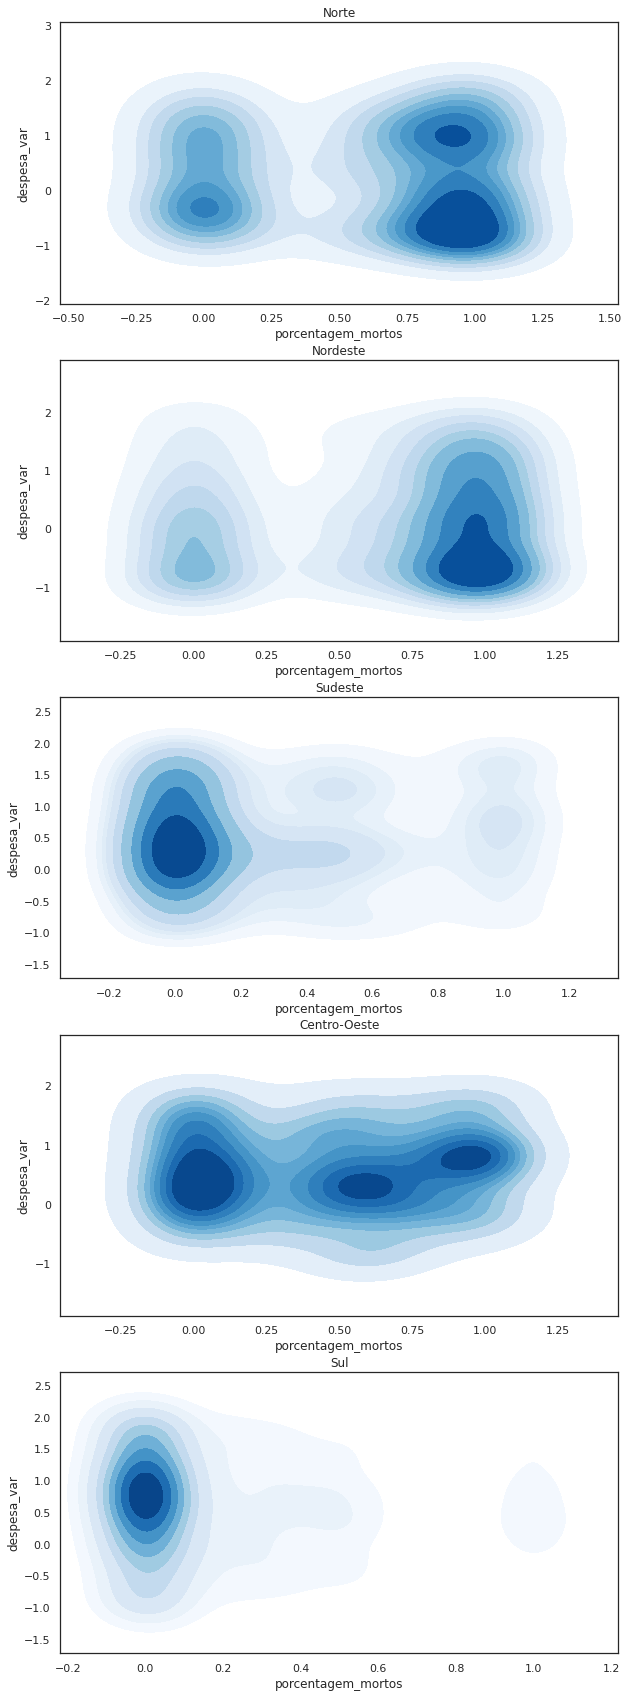

In [532]:
sns.set_style("white")
f, axes = plt.subplots(5, 1, figsize=(10, 30))
for i, regiao in enumerate(regioes):
    prop_mortes = np.array(df_desp_prop[df_desp_prop["sigla_uf"].isin(regioes[regiao])]["prop_mortes_2019"])
    variacao_desp = np.array(df_desp_prop[df_desp_prop["sigla_uf"].isin(regioes[regiao])]["variacao desp"])
    sns.kdeplot(x=prop_mortes, y=variacao_desp, cmap="Blues", shade=True, ax=axes[i])
    axes[i].set_title(regiao)
    axes[i].set_xlabel("porcentagem_mortos")
    axes[i].set_ylabel("despesa_var")
plt.show()